----
#### 40 Examples to Master Pandas
  - A comprehensive practical guide
  - https://towardsdatascience.com/40-examples-to-master-pandas-c69d058f434e
  - The best way to get comfortable working with Pandas is through practice.
----

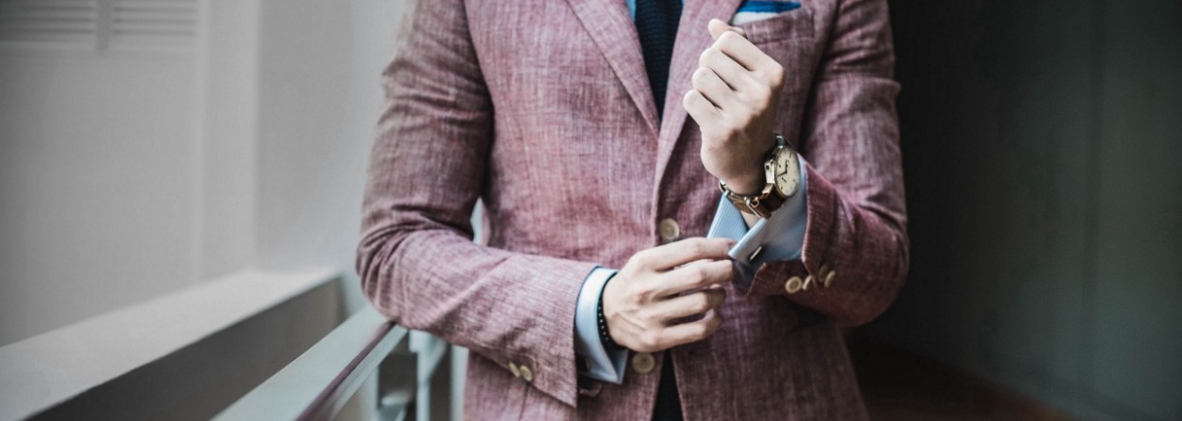

----
#### 1. Reading csv files
  * The read_csv function provides flexible ways for reading csv files into Pandas dataframes.
----

In [1]:
import numpy as np
import pandas as pd

marketing = pd.read_csv("DirectMarketing.csv")
groceries = pd.read_csv("Groceries_dataset.csv")

In [2]:
len(marketing.columns), marketing.columns

(10,
 Index(['Age', 'Gender', 'OwnHome', 'Married', 'Location', 'Salary', 'Children',
        'History', 'Catalogs', 'AmountSpent'],
       dtype='object'))

In [3]:
len(groceries.columns), groceries.columns

(3, Index(['Member_number', 'Date', 'itemDescription'], dtype='object'))

In [4]:
marketing.dtypes

Age            object
Gender         object
OwnHome        object
Married        object
Location       object
Salary          int64
Children        int64
History        object
Catalogs        int64
AmountSpent     int64
dtype: object

In [5]:
groceries.dtypes   # date column is object data type

Member_number       int64
Date               object
itemDescription    object
dtype: object

In [6]:
marketing.isna().sum()

Age              0
Gender           0
OwnHome          0
Married          0
Location         0
Salary           0
Children         0
History        303
Catalogs         0
AmountSpent      0
dtype: int64

In [7]:
groceries.isna().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [8]:
marketing.shape, groceries.shape

((1000, 10), (38765, 3))

----
#### 2. Changing data type with astype
  - The dates need to be stored in the datetime data type in order to use the datetime functions of Pandas. 
  - Let’s check the data type of the columns of the groceries dataframe.
----

In [9]:
groceries.dtypes

Member_number       int64
Date               object
itemDescription    object
dtype: object

In [10]:
groceries["Date"] = groceries["Date"].astype("datetime64")

In [11]:
groceries.dtypes

Member_number               int64
Date               datetime64[ns]
itemDescription            object
dtype: object

In [12]:
groceries.head()

,Member_number,Date,itemDescription
0,1808,2015-07-21,tropical fruit
1,2552,2015-05-01,whole milk
2,2300,2015-09-19,pip fruit
3,1187,2015-12-12,other vegetables
4,3037,2015-01-02,whole milk


----
#### 3. Changing the data type with to_datetime
  - We can also use the to_datetime function to assign appropriate data types for dates. 
  - The syntax is a little different than the astype function.
----

In [13]:
groceries["Date"] = pd.to_datetime(groceries["Date"])

In [14]:
groceries.dtypes

Member_number               int64
Date               datetime64[ns]
itemDescription            object
dtype: object

----
#### 4. Parsing dates
  - In the first examples, I mentioned that the read_csv function is quite flexible at reading the csv files. 
  - It can also handle the dates. We can assign appropriate data types for dates while reading the data. 
  - It will save us from having to change the data type later on.
----

In [15]:
groceries = pd.read_csv("Groceries_dataset.csv", parse_dates=["Date"])

In [16]:
groceries.dtypes

Member_number               int64
Date               datetime64[ns]
itemDescription            object
dtype: object

----
#### 5. Filtering with the isin method
  - There are many ways to filter a dataframe based on the values. 
  - We can use logical operators such as equal (==), not equal (!=), or greater than (>).
  - The isin method allows to filter based on a specific set of values. 
  - We can just pass a list of the values we want to filter.
----

In [17]:
groceries.head()

,Member_number,Date,itemDescription
0,1808,2015-07-21,tropical fruit
1,2552,2015-05-01,whole milk
2,2300,2015-09-19,pip fruit
3,1187,2015-12-12,other vegetables
4,3037,2015-01-02,whole milk


In [18]:
groceries[groceries.Member_number.isin([3037])]

,Member_number,Date,itemDescription
4,3037,2015-01-02,whole milk
1232,3037,2015-02-23,cling film/bags
16153,3037,2015-01-02,other vegetables
17381,3037,2015-02-23,ham
36092,3037,2015-01-02,white bread


In [19]:
groceries[groceries.Member_number.isin([3037])].shape

(5, 3)

In [20]:
groceries[groceries.Member_number.isin([3737, 2433, 3915, 2625])].shape

(126, 3)

----
#### 6. Tilde operator
  - The tilde (~) operator can be used as “not” while applying filters. 
  - For instance, we can find the complement of the filtered rows in the previous example by just adding the tilde operator at the beginning.
----

In [21]:
groceries.shape

(38765, 3)

In [22]:
groceries[~groceries.Member_number.isin([3737, 2433, 3915, 2625])].shape

(38639, 3)

In [23]:
groceries[groceries.Member_number.isin([3737, 2433, 3915, 2625])].shape

(126, 3)

In [24]:
38639 + 126, (38639 + 126) == 38765

(38765, True)

----
#### 7. Value counts with normalization
  - The value_counts is one of most frequently used functions. 
  - It counts the number of occurrences of each value and returns a series. 
  - If it is used with the normalize parameter, we get an overview of the percentage of the occurrences.
----

In [25]:
marketing.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent
0,Old,Female,Own,Single,Far,47500,0,High,6,755
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304


In [26]:
marketing.Catalogs.unique()

array([ 6, 18, 12, 24], dtype=int64)

In [27]:
marketing.Catalogs.value_counts()

12    282
6     252
24    233
18    233
Name: Catalogs, dtype: int64

In [28]:
marketing.Catalogs.value_counts().sort_index()

6     252
12    282
18    233
24    233
Name: Catalogs, dtype: int64

In [29]:
marketing["Catalogs"].value_counts(normalize=True).sort_index()

6     0.252
12    0.282
18    0.233
24    0.233
Name: Catalogs, dtype: float64

In [30]:
marketing["Catalogs"].value_counts(normalize=True).sum()

1.0

----
#### 8. Setting a column as index
  - Pandas assigns integer index to dataframes by default but we can change it to any column using the set_index function.
  - For instance, we can set the date column as the index of the groceries dataframe.
----

In [31]:
groceries.head()

,Member_number,Date,itemDescription
0,1808,2015-07-21,tropical fruit
1,2552,2015-05-01,whole milk
2,2300,2015-09-19,pip fruit
3,1187,2015-12-12,other vegetables
4,3037,2015-01-02,whole milk


In [32]:
groceries.set_index("Date").head()

,Member_number,itemDescription
Date,,
2015-07-21,1808,tropical fruit
2015-05-01,2552,whole milk
2015-09-19,2300,pip fruit
2015-12-12,1187,other vegetables
2015-01-02,3037,whole milk


In [33]:
groceries.set_index("Date", inplace=True)

In [34]:
groceries.head()

,Member_number,itemDescription
Date,,
2015-07-21,1808,tropical fruit
2015-05-01,2552,whole milk
2015-09-19,2300,pip fruit
2015-12-12,1187,other vegetables
2015-01-02,3037,whole milk


----
#### 9. Resetting the index
  - When some rows are dropped, Pandas does not automatically reset the index. 
  - Similarly, when two dataframes are concatenated, the indices will not be reset. 
  - In such cases, the new dataframes will not have consecutive index values.
  - We can use the reset_index function in those cases. 
  - I have dropped some rows of the groceries dataframe:
----

In [35]:
groceries = pd.read_csv("Groceries_dataset.csv")

In [36]:
groceries.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [37]:
groceries.drop(index=[1,3,5,7,9], inplace=True)

In [38]:
groceries.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
2,2300,19-09-2015,pip fruit
4,3037,01-02-2015,whole milk
6,4501,08-05-2015,other vegetables
8,2762,20-03-2015,whole milk


In [39]:
# As you can see, some indices are skipped. 
# We can now use the reset_index function.
groceries.reset_index(drop=True, inplace=True)

In [40]:
groceries.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2300,19-09-2015,pip fruit
2,3037,01-02-2015,whole milk
3,4501,08-05-2015,other vegetables
4,2762,20-03-2015,whole milk


----
#### 10. The unique values
  - The unique function returns an array of the unique values in a column.
----

In [41]:
len(groceries.itemDescription.unique())

167

In [42]:
groceries.itemDescription.unique()[0:5]

array(['tropical fruit', 'pip fruit', 'whole milk', 'other vegetables',
       'citrus fruit'], dtype=object)

In [43]:
groceries.itemDescription.value_counts()

whole milk               2501
other vegetables         1897
rolls/buns               1715
soda                     1514
yogurt                   1334
                         ... 
rubbing alcohol             5
bags                        4
baby cosmetics              3
preservation products       1
kitchen utensil             1
Name: itemDescription, Length: 167, dtype: int64

In [44]:
value = groceries.itemDescription.value_counts()

In [45]:
value.rank(method="first")[0:10]

whole milk          167.0
other vegetables    166.0
rolls/buns          165.0
soda                164.0
yogurt              163.0
root vegetables     162.0
tropical fruit      161.0
bottled water       160.0
sausage             159.0
citrus fruit        158.0
Name: itemDescription, dtype: float64

----
#### 11. The number of unique values
  - If we are only interested in the number of unique values, we can use the nunique function. 
  - It can be called on the entire dataframe or a particular column.
----

In [46]:
groceries.nunique()

Member_number      3898
Date                728
itemDescription     167
dtype: int64

In [47]:
groceries.Date.nunique()

728

In [48]:
marketing.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent
0,Old,Female,Own,Single,Far,47500,0,High,6,755
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304


In [49]:
marketing.nunique()

Age              3
Gender           2
OwnHome          2
Married          2
Location         2
Salary         636
Children         4
History          3
Catalogs         4
AmountSpent    852
dtype: int64

In [50]:
marketing.Age.unique()

array(['Old', 'Middle', 'Young'], dtype=object)

----
#### 11. Creating a random sample of larger size
  - The sample function can be used to create a random sample of the rows of a dataframe. 
  - It comes in handy when working with unbalanced datasets in machine learning.
  - We can only create samples that are smaller than the original one unless the replace parameter is changed to true. 
  - The replace parameter allows for using the same row more than once.
  - Let us create a random sample of the groceries dataframe by only using the rows with a spent amount of less than 300.
----

In [51]:
marketing.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent
0,Old,Female,Own,Single,Far,47500,0,High,6,755
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304


In [52]:
less = marketing[marketing.AmountSpent < 600].sample(n=300)
less.shape

(300, 10)

In [53]:
less.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent
747,Young,Male,Rent,Single,Far,19400,0,Low,6,563
605,Young,Male,Rent,Single,Close,13400,0,Low,18,424
806,Middle,Female,Rent,Single,Close,43000,3,Low,24,225
680,Young,Female,Rent,Single,Close,13200,1,Low,12,227
816,Old,Female,Own,Single,Close,12700,2,Low,6,65


In [54]:
less.reset_index(drop=True, inplace=True)

In [55]:
less

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent
0,Young,Male,Rent,Single,Far,19400,0,Low,6,563
1,Young,Male,Rent,Single,Close,13400,0,Low,18,424
2,Middle,Female,Rent,Single,Close,43000,3,Low,24,225
3,Young,Female,Rent,Single,Close,13200,1,Low,12,227
4,Old,Female,Own,Single,Close,12700,2,Low,6,65
...,...,...,...,...,...,...,...,...,...,...
295,Young,Female,Rent,Single,Far,13500,2,Low,12,160
296,Young,Female,Rent,Married,Close,40900,2,Low,18,576
297,Young,Male,Own,Single,Close,23200,0,NaN,24,534
298,Middle,Female,Rent,Married,Close,60500,2,Low,6,409


----
#### 12. Combining dataframes with concat
  - We can concatenate dataframes horizontally or vertically with the concat function. 
  - The axis parameter is used to determine the axis through which the concatenation occurs.
  - We can concatenate the marketing and sample dataframes we created in the previous examples.
----

In [56]:
# The default values of the axis parameter is 0 which means concatenating along index. 
# The dataframes must have the same number of columns.

less.shape, marketing.shape

((300, 10), (1000, 10))

In [57]:
df_new = pd.concat([marketing, less])
df_new.shape

(1300, 10)

In [58]:
df_new.tail()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent
295,Young,Female,Rent,Single,Far,13500,2,Low,12,160
296,Young,Female,Rent,Married,Close,40900,2,Low,18,576
297,Young,Male,Own,Single,Close,23200,0,NaN,24,534
298,Middle,Female,Rent,Married,Close,60500,2,Low,6,409
299,Middle,Female,Own,Married,Close,63700,3,Low,12,364


----
#### 13. Selecting a range of rows and columns by index
  - We can select a range of rows and columns by using the iloc function. 
  - It accepts the indices of the desired rows and columns. 
  - The pandas dataframes have integer index for both rows and columns.
----

In [59]:
# For instance, we can select the first 4 rows and the first 3 columns as follows:
marketing.iloc[:4, :3]

,Age,Gender,OwnHome
0,Old,Female,Own
1,Middle,Male,Rent
2,Young,Female,Rent
3,Middle,Male,Own


----
#### 14. Selecting specific rows and columns by index with iloc
  - The iloc function also accepts an array of values instead of ranges. 
  - We can pass a list or numpy array.
----

In [60]:
to_select = np.random.randint(100, size=10) # rom `low` (inclusive) to `high` (exclusive)
print(type(to_select), to_select)
to_select = sorted(list(set(to_select)))
print(type(to_select), to_select)

<class 'numpy.ndarray'> [20 14 99 84  2 92 75 67 55 49]
<class 'list'> [2, 14, 20, 49, 55, 67, 75, 84, 92, 99]


In [61]:
marketing.iloc[to_select, [2,4,6]]

,OwnHome,Location,Children
2,Rent,Close,0
14,Own,Far,0
20,Rent,Far,2
49,Own,Close,1
55,Rent,Close,0
67,Rent,Far,0
75,Own,Close,1
84,Own,Close,0
92,Own,Close,0
99,Rent,Far,2


----
#### 15. Selecting rows and columns by label with loc
  - The loc function is just like the iloc function but it accepts labels instead of indices.
----

In [62]:
marketing.loc[to_select, ["OwnHome", "Location", "Children"]]

,OwnHome,Location,Children
2,Rent,Close,0
14,Own,Far,0
20,Rent,Far,2
49,Own,Close,1
55,Rent,Close,0
67,Rent,Far,0
75,Own,Close,1
84,Own,Close,0
92,Own,Close,0
99,Rent,Far,2


----
#### 16. Extracting the year and month from dates
  - Pandas provides lots of functions to operate on the dates. 
  - They are used through the dt accessor.
----

In [63]:
groceries.dtypes

Member_number       int64
Date               object
itemDescription    object
dtype: object

In [64]:
groceries["Date"] = groceries.Date.astype("datetime64")
groceries.dtypes

Member_number               int64
Date               datetime64[ns]
itemDescription            object
dtype: object

In [65]:
groceries.head()

,Member_number,Date,itemDescription
0,1808,2015-07-21,tropical fruit
1,2300,2015-09-19,pip fruit
2,3037,2015-01-02,whole milk
3,4501,2015-08-05,other vegetables
4,2762,2015-03-20,whole milk


In [66]:
# We can easily extract the year and month from dates as follows:
groceries["Year"], groceries["Month"] = groceries["Date"].dt.year, groceries["Date"].dt.month

In [67]:
groceries.head()

,Member_number,Date,itemDescription,Year,Month
0,1808,2015-07-21,tropical fruit,2015,7
1,2300,2015-09-19,pip fruit,2015,9
2,3037,2015-01-02,whole milk,2015,1
3,4501,2015-08-05,other vegetables,2015,8
4,2762,2015-03-20,whole milk,2015,3


----
#### 17. Dropping columns and rows
  - In the previous example, we created two new columns. 
  - By default, pandas add the new columns at the end of a dataframe but we can change it.
  - We will add the new columns at a specific position in the next example. 
  - We pass the list of columns or rows to be dropped. 
  - The axis parameter needs to be 1 to drop columns and 0 to drop rows.
----

In [68]:
# However, we first need to drop them which can be done by using the drop function.
groceries.drop(["Year", "Month"], axis=1, inplace=True)
groceries.head()

,Member_number,Date,itemDescription
0,1808,2015-07-21,tropical fruit
1,2300,2015-09-19,pip fruit
2,3037,2015-01-02,whole milk
3,4501,2015-08-05,other vegetables
4,2762,2015-03-20,whole milk


In [69]:
groceries.drop(range(3), axis=0).head()    # case 1

,Member_number,Date,itemDescription
3,4501,2015-08-05,other vegetables
4,2762,2015-03-20,whole milk
5,1340,2015-02-24,citrus fruit
6,2193,2015-04-14,beef
7,1997,2015-07-21,frankfurter


In [70]:
groceries.drop([0,1,2], axis=0).head()     # case 2 is the same

,Member_number,Date,itemDescription
3,4501,2015-08-05,other vegetables
4,2762,2015-03-20,whole milk
5,1340,2015-02-24,citrus fruit
6,2193,2015-04-14,beef
7,1997,2015-07-21,frankfurter


----
#### 18. Inserting a column with insert
  - The year and month columns might look better if they are placed before the date column. 
  - We can use the insert function to accomplish this task.
----

In [71]:
year  = groceries["Date"].dt.year
month = groceries["Date"].dt.month

groceries.insert(1, "Year", year)
groceries.insert(2, "Month", month)

groceries.head()

,Member_number,Year,Month,Date,itemDescription
0,1808,2015,7,2015-07-21,tropical fruit
1,2300,2015,9,2015-09-19,pip fruit
2,3037,2015,1,2015-01-02,whole milk
3,4501,2015,8,2015-08-05,other vegetables
4,2762,2015,3,2015-03-20,whole milk


In [72]:
groceries.dtypes

Member_number               int64
Year                        int64
Month                       int64
Date               datetime64[ns]
itemDescription            object
dtype: object

----
#### 19. Replacing values
  - In the previous example, we created a month column that contains numbers to represent months. 
  - You may want this column to contain the names of months (i.e. January, February, and so on).
  - There are multiple ways to do this operation. 
  - I will first show you the harder way. 
  - In the next example, we will see a much simpler method.
  - We can use the replace function to replace integers with strings of month names.
----

In [73]:
month_names =   {1:'January',    2:'February',  3:'March',     4:'April',
                 5: 'May',       6:'June',      7:'July',      8:'August', 
                 9:'September', 10:'October',  11:'November', 12:'December'}

In [74]:
groceries.head()

,Member_number,Year,Month,Date,itemDescription
0,1808,2015,7,2015-07-21,tropical fruit
1,2300,2015,9,2015-09-19,pip fruit
2,3037,2015,1,2015-01-02,whole milk
3,4501,2015,8,2015-08-05,other vegetables
4,2762,2015,3,2015-03-20,whole milk


In [75]:
groceries.Month.replace(month_names, inplace=True)
groceries.head()

,Member_number,Year,Month,Date,itemDescription
0,1808,2015,July,2015-07-21,tropical fruit
1,2300,2015,September,2015-09-19,pip fruit
2,3037,2015,January,2015-01-02,whole milk
3,4501,2015,August,2015-08-05,other vegetables
4,2762,2015,March,2015-03-20,whole milk


In [76]:
df = pd.read_csv("Groceries_dataset.csv", parse_dates=["Date"])
df["Month"] = df["Date"].dt.month
df["Month"] = df["Month"].replace(month_names)

In [77]:
df.head()

,Member_number,Date,itemDescription,Month
0,1808,2015-07-21,tropical fruit,July
1,2552,2015-05-01,whole milk,May
2,2300,2015-09-19,pip fruit,September
3,1187,2015-12-12,other vegetables,December
4,3037,2015-01-02,whole milk,January


----
#### 20. Month name
  - There is much simpler way of doing the task in the previous step. 
  - We will make a function of the dt accessor.
----

In [78]:
df = pd.read_csv("Groceries_dataset.csv", parse_dates=["Date"])
df["Month"] = df["Date"].dt.month_name()
df["Year"]  = df["Date"].dt.year
df.head()

,Member_number,Date,itemDescription,Month,Year
0,1808,2015-07-21,tropical fruit,July,2015
1,2552,2015-05-01,whole milk,May,2015
2,2300,2015-09-19,pip fruit,September,2015
3,1187,2015-12-12,other vegetables,December,2015
4,3037,2015-01-02,whole milk,January,2015


In [79]:
df = pd.read_csv("Groceries_dataset.csv", parse_dates=["Date"])
df.insert(1, "Month", df["Date"].dt.month_name())
df.insert(1, "Year",  df["Date"].dt.year)
df.head()

,Member_number,Year,Month,Date,itemDescription
0,1808,2015,July,2015-07-21,tropical fruit
1,2552,2015,May,2015-05-01,whole milk
2,2300,2015,September,2015-09-19,pip fruit
3,1187,2015,December,2015-12-12,other vegetables
4,3037,2015,January,2015-01-02,whole milk


----
#### 21. The cumulative sum
  - The cumsum function allows to create a column based on the cumulative sum of another column. 
  - Consider the marketing dataframe. 
  - We can create a column that contains the cumulative sum of the spent amount.

In [80]:
marketing.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent
0,Old,Female,Own,Single,Far,47500,0,High,6,755
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304


In [81]:
marketing["cumsumAmountSpent"] = marketing["AmountSpent"].cumsum()
marketing.tail()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent,cumsumAmountSpent
995,Young,Female,Rent,Single,Close,19400,1,NaN,18,384,1212636
996,Middle,Male,Rent,Single,Far,40500,1,NaN,18,1073,1213709
997,Old,Male,Own,Single,Close,44800,0,Medium,24,1417,1215126
998,Middle,Male,Own,Married,Close,79000,2,Medium,18,671,1215797
999,Young,Male,Rent,Married,Close,53600,1,Medium,24,973,1216770


In [82]:
marketing.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent,cumsumAmountSpent
0,Old,Female,Own,Single,Far,47500,0,High,6,755,755
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318,2073
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296,2369
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436,4805
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304,6109


----
#### 22. Filtering strings
  - In the previous example, we have mentioned the dt accessor which makes it very easy and simple to deal with dates. 
  - Similarly, the str accessor provides many functions and methods that expedite to process textual data.
  - For instance, we can check if strings contain a specific set of characters. 
  - A typical use case would be to count the number of rows that contains the word “milk” in the description column of the groceries table.
----

In [83]:
groceries[groceries["itemDescription"].str.contains("milk")]

,Member_number,Year,Month,Date,itemDescription
2,3037,2015,January,2015-01-02,whole milk
4,2762,2015,March,2015-03-20,whole milk
15,2810,2015,August,2015-08-09,butter milk
16,2867,2015,December,2015-12-11,whole milk
38,2658,2015,October,2015-10-16,butter milk
...,...,...,...,...,...
38667,4211,2014,March,2014-03-04,whole milk
38683,2049,2014,February,2014-02-04,whole milk
38684,4855,2014,June,2014-06-16,whole milk
38690,3382,2014,November,2014-11-13,UHT-milk


In [84]:
groceries["itemDescription"] = groceries["itemDescription"].astype("string")
groceries.dtypes 

Member_number               int64
Year                        int64
Month                      object
Date               datetime64[ns]
itemDescription            string
dtype: object

In [85]:
milk = groceries[groceries["itemDescription"].str.contains("milk")]

In [86]:
milk["itemDescription"].unique()

<StringArray>
['whole milk', 'butter milk', 'condensed milk', 'UHT-milk']
Length: 4, dtype: string

In [87]:
groceries["itemDescription"].str.contains("milk").sum()

3185

In [88]:
groceries["itemDescription"].str.contains("condensed milk").sum()

98

In [89]:
groceries["itemDescription"].dtypes

StringDtype

----
#### 23. Filtering strings based on length with len
  - We can also filter string based on the length (i.e. number of characters). 
  - Let us find the items with long descriptions.
----

In [90]:
groceries[groceries.itemDescription.str.len() > 20]

,Member_number,Year,Month,Date,itemDescription
10,1959,2015,March,2015-03-30,fruit/vegetable juice
11,1974,2015,March,2015-03-05,packaged fruit/vegetables
30,1905,2015,February,2015-02-21,fruit/vegetable juice
50,1326,2015,June,2015-06-19,packaged fruit/vegetables
68,4875,2015,December,2015-12-05,frozen potato products
...,...,...,...,...,...
38742,2639,2014,August,2014-08-06,fruit/vegetable juice
38749,4796,2014,February,2014-02-03,Instant food products
38751,1987,2014,October,2014-10-29,fruit/vegetable juice
38753,2511,2014,June,2014-06-18,long life bakery product


In [91]:
groceries[groceries.itemDescription.str.len() > 20].itemDescription.unique()

<StringArray>
[    'fruit/vegetable juice', 'packaged fruit/vegetables',
    'frozen potato products',     'Instant food products',
  'female sanitary products',    'house keeping products',
     'chocolate marshmallow',  'long life bakery product',
    'flower soil/fertilizer',     'preservation products']
Length: 10, dtype: string

----
#### 24. Plotting the distribution of a variable
  - Pandas is not a data visualization library so it is not optimized for visualization tasks. 
  - However, it provides plotting functions which I think make it highly convenient to produce basic plots.
  - For instance, we can create a kde plot to see the distribution of the salary column.
----

<AxesSubplot:title={'center':'Distribution of Salary'}, ylabel='Density'>

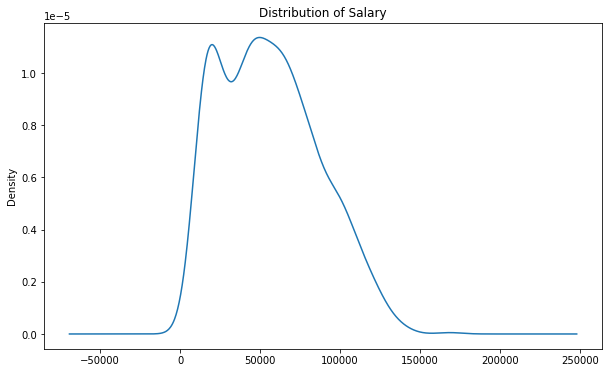

In [92]:
marketing.Salary.plot(kind='kde', title='Distribution of Salary',figsize=(10,6))

In [93]:
marketing.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent,cumsumAmountSpent
0,Old,Female,Own,Single,Far,47500,0,High,6,755,755
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318,2073
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296,2369
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436,4805
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304,6109


----
#### 25. Creating a histogram
  - Histograms are also commonly used to check the distribution of a numerical feature. 
  - We can use the plot function to produce histograms as well.
----

<AxesSubplot:title={'center':'Distribution of Salary'}, ylabel='Frequency'>

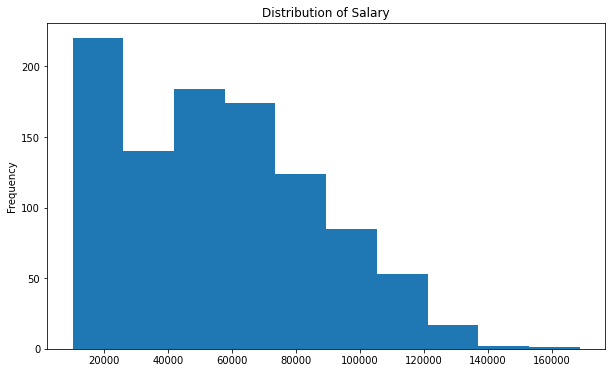

In [94]:
marketing.Salary.plot(kind='hist', title='Distribution of Salary',figsize=(10,6))

----
#### 26. Trend in the monthly sales
  - In this example, we will combine a few operations to create a plot that shows the trend in monthly sales.
  - The first step is to create a month column as we did previously.
----

In [95]:
groceries['month_name'] = groceries['Date'].dt.month_name()

<AxesSubplot:title={'center':'Monthly Sales'}, xlabel='month_name'>

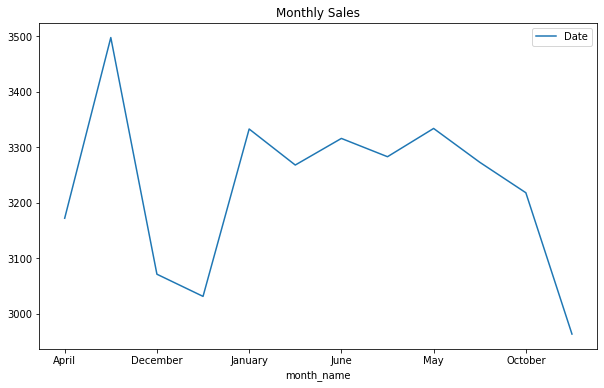

In [96]:
# We will calculate the number of items sold in each month by using the group by function 
# and then plot the values.
groceries[['month_name','Date']].groupby('month_name').count().plot(title="Monthly Sales", figsize=(10,6))

In [97]:
groceries[['month_name','Date']].groupby('month_name').count()

,Date
month_name,
April,3172
August,3498
December,3071
February,3031
January,3333
July,3268
June,3316
March,3283
May,3334


----
#### 27. Different aggregate funtions to different columns
  - It is possible to apply different aggregate functions to different columns in the group by function. 
  - We can pass a dictionary to indicate which functions will be applied to which columns.
----

In [98]:
marketing.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent,cumsumAmountSpent
0,Old,Female,Own,Single,Far,47500,0,High,6,755,755
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318,2073
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296,2369
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436,4805
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304,6109


In [99]:
marketing[["Married", "Salary", "AmountSpent"]].groupby("Married") \
          .agg({"Salary": "mean", "AmountSpent": "sum"})

,Salary,AmountSpent
Married,,
Married,76696.414343,839379
Single,35345.983936,377391


In [100]:
marketing[['Married','Salary','AmountSpent']].groupby(['Married'])\
        .agg(
            Average_salary = pd.NamedAgg('Salary',      'mean'),
            Total_spent    = pd.NamedAgg('AmountSpent', 'sum')
).round(1)

,Average_salary,Total_spent
Married,,
Married,76696.4,839379
Single,35346.0,377391


----
#### 29. Crosstab function
  - The cross tab function is used to create a cross table based on specified columns, values, and aggregate functions. 
  - It is similar to a pivot table.
  - For instance, we can calculate the average salary of cross categories between the age and gender columns.
----

In [101]:
pd.crosstab(index=marketing.Age, columns=marketing.Gender, values=marketing.Salary, aggfunc='mean').round(1)
# The middle aged males have the highest average salary.

Gender,Female,Male
Age,,
Middle,65787.9,76298.7
Old,50214.0,66807.9
Young,25485.4,31003.4


In [102]:
marketing.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent,cumsumAmountSpent
0,Old,Female,Own,Single,Far,47500,0,High,6,755,755
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318,2073
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296,2369
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436,4805
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304,6109


In [103]:
marketing.Location.unique()

array(['Far', 'Close'], dtype=object)

In [104]:
marketing.OwnHome.unique()

array(['Own', 'Rent'], dtype=object)

----
#### 30. Crosstab function — 2
  - We will do a slightly more complex example with the crosstab function. 
  - We can pass multiple columns and also display the overall values.
----

In [105]:
pd.crosstab(index   = [marketing.Age, marketing.Married], 
            columns = marketing.Gender,
            values  = marketing.Salary, aggfunc='mean',
margins=True).round(1)
# This cross table is more informative than the previous one as it includes more specific categories 
# and overall average values.

Gender           Female     Male      All
Age    Married                           
Middle Married  82194.7  90290.0  87151.0
       Single   45457.6  55655.7  51271.5
Old    Married  67094.6  73144.4  69646.9
       Single   27501.8  51254.5  34288.3
Young  Married  49578.4  49534.9  49555.0
       Single   18832.8  20087.7  19275.4
All             48197.4  64202.4  56103.9

In [106]:
marketing.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [107]:
(82194.7	+ 90290.0)/2 == 	87151.0

False

In [108]:
(82194.7	+ 90290.0)/2

86242.35

----
#### 31. Pivot_table function
  - It is extremely similar to the crosstable function with a few small differences in the syntax. 
  - I will create the same table as in the previous example using the pivot_table function.
  - We can pass the dataframe to the data parameter and use the column names as strings.
----

In [109]:
pd.pivot_table(data=marketing, 
               index=['Age', 'Married'], 
               columns='Gender', 
               values='Salary', 
               aggfunc='mean',
               margins=True).round(1)

Gender           Female     Male      All
Age    Married                           
Middle Married  82194.7  90290.0  87151.0
       Single   45457.6  55655.7  51271.5
Old    Married  67094.6  73144.4  69646.9
       Single   27501.8  51254.5  34288.3
Young  Married  49578.4  49534.9  49555.0
       Single   18832.8  20087.7  19275.4
All             48197.4  64202.4  56103.9

In [110]:
pd.pivot_table(data=marketing, 
               index=['Age', 'Married'], 
               columns='Gender', 
               values='Salary', 
               aggfunc='mean',
               margins=False).round(1)

Gender           Female     Male
Age    Married                  
Middle Married  82194.7  90290.0
       Single   45457.6  55655.7
Old    Married  67094.6  73144.4
       Single   27501.8  51254.5
Young  Married  49578.4  49534.9
       Single   18832.8  20087.7

In [111]:
marketing[["Age", "Married", "Gender", "Salary"]].groupby(["Age", "Married"]).agg("mean").round(1)

Salary
Age    Married         
Middle Married  87151.0
       Single   51271.5
Old    Married  69646.9
       Single   34288.3
Young  Married  49555.0
       Single   19275.4

----
#### 32. Splitting strings
  - The string accessor can be used to split or combine strings. 
  - For instance, we can split the parts of the date in the groceries dataframe to obtain day, month, and year values.
  - Please note that the data type should be object or string to be able apply str accessor.
----

In [112]:
groceries.dtypes

Member_number               int64
Year                        int64
Month                      object
Date               datetime64[ns]
itemDescription            string
month_name                 object
dtype: object

In [113]:
groceries.head()

,Member_number,Year,Month,Date,itemDescription,month_name
0,1808,2015,July,2015-07-21,tropical fruit,July
1,2300,2015,September,2015-09-19,pip fruit,September
2,3037,2015,January,2015-01-02,whole milk,January
3,4501,2015,August,2015-08-05,other vegetables,August
4,2762,2015,March,2015-03-20,whole milk,March


In [114]:
groceries["Date_str"] = groceries.Date.astype("string")
groceries.dtypes

Member_number               int64
Year                        int64
Month                      object
Date               datetime64[ns]
itemDescription            string
month_name                 object
Date_str                   string
dtype: object

In [115]:
groceries["digit_month"] =  groceries["Date_str"].str.split("-", expand=True)[1]
groceries.head()

,Member_number,Year,Month,Date,itemDescription,month_name,Date_str,digit_month
0,1808,2015,July,2015-07-21,tropical fruit,July,2015-07-21,07
1,2300,2015,September,2015-09-19,pip fruit,September,2015-09-19,09
2,3037,2015,January,2015-01-02,whole milk,January,2015-01-02,01
3,4501,2015,August,2015-08-05,other vegetables,August,2015-08-05,08
4,2762,2015,March,2015-03-20,whole milk,March,2015-03-20,03


----
#### 33. Splitting strings on character level
  - We can select part of strings based on the position of characters. 
  - Consider the previous example. 
  - We may want to retrieve the last two characters of the years (e.g. 15 instead of 2015).
----

In [116]:
groceries['year'] = groceries['Date_str'].str.split('-', expand=True)[0].str[-2:]

In [117]:
groceries.head()

,Member_number,Year,Month,Date,itemDescription,month_name,Date_str,digit_month,year
0,1808,2015,July,2015-07-21,tropical fruit,July,2015-07-21,07,15
1,2300,2015,September,2015-09-19,pip fruit,September,2015-09-19,09,15
2,3037,2015,January,2015-01-02,whole milk,January,2015-01-02,01,15
3,4501,2015,August,2015-08-05,other vegetables,August,2015-08-05,08,15
4,2762,2015,March,2015-03-20,whole milk,March,2015-03-20,03,15


In [118]:
groceries['year'] = groceries['Date_str'].str.split('-', expand=True)[0].str[2:4] # 2015 >> 15
groceries.head()

,Member_number,Year,Month,Date,itemDescription,month_name,Date_str,digit_month,year
0,1808,2015,July,2015-07-21,tropical fruit,July,2015-07-21,07,15
1,2300,2015,September,2015-09-19,pip fruit,September,2015-09-19,09,15
2,3037,2015,January,2015-01-02,whole milk,January,2015-01-02,01,15
3,4501,2015,August,2015-08-05,other vegetables,August,2015-08-05,08,15
4,2762,2015,March,2015-03-20,whole milk,March,2015-03-20,03,15


----
#### 34. Sidetable
  - Sidetable is an add-on for Pandas which makes it easier to create summaries of dataframes. 
  - It can be considered as a combination of value counts and cross tab functions.
  - Once installed, it can be used as other accessors such as str and dt.
    * pip install sidetable
    * https://towardsdatascience.com/pandas-sidetable-a-smarter-way-of-using-pandas-96fa7c61e514
----

In [119]:
import sidetable

groceries.stb.freq(['itemDescription'], thresh=25)

ModuleNotFoundError: No module named 'sidetable'

In [ ]:
groceries.head()

In [ ]:
groceries.itemDescription.value_counts().head(10)

In [ ]:
groceries.stb.freq(['itemDescription'])

----
#### 35. Finding missing values
  - Missing values need to be handled very carefully in order to make accurate and robust analysis.
  - The isna function can be used the find the missing values in a dataframe. 
  - It returns true if the value is missing. 
  - Thus, we can count the total number of missing values by applying the sum function.
----

In [ ]:
groceries.isna().sum()

In [ ]:
marketing.isna().sum()

In [ ]:
marketing.stb.missing()

----
#### 36. Handling missing values with fillna
  - The fillna function can be used to handle missing values. 
  - It provides many options to fill missing values such as mean, median, or a constant value.
  - We can also use the previous or next value to fill a missing value.
    - Let us first change a few values as missing value in the groceries dataframe.
----

In [ ]:
df = pd.read_csv("Groceries_dataset.csv", parse_dates=["Date"])
df.head()

In [ ]:
df.iloc[[1,10,30], [1,2]] = np.nan

In [ ]:
df.stb.missing()

In [ ]:
groceries['itemDescription'].fillna(value=groceries['itemDescription'].mode()[0], inplace=True)

In [ ]:
# The mode of a set of values is the value that appears most often.
groceries['itemDescription'].mode()

In [ ]:
groceries['itemDescription'].value_counts().index[0]

In [ ]:
df.head()

In [ ]:
df['Date'].fillna(method='ffill', inplace=True)

In [ ]:
df.head()

In [ ]:
df['itemDescription'].fillna(value=df['itemDescription'].mode()[0], inplace=True)

In [ ]:
df.head()

----
#### 37. Selecting data types
  - The select_dtypes function can be used select columns that belong or does not belong to a particular data type.
  - We can include or exclude certain data types.
----

In [ ]:
marketing.select_dtypes(include='object').columns

In [ ]:
marketing.select_dtypes(exclude='object').columns

In [ ]:
marketing.dtypes

----
#### 38. Creating a dataframe
  - The DataFrame function can be used to create a dataframe. 
  - A dictionary can be passed to the DataFrame function. 
  - The keys will be the column names and the values will represent the row values.
  - Let’s create a dataframe that contains the prices of the items in the groceries dataframe.
----

In [ ]:
groceries.itemDescription.unique()

In [ ]:
np.random.randint(10, size=len(groceries.itemDescription.unique()) )

In [ ]:
# We assign the prices randomly by creating a numpy array of random integers between (0 and 10].
unique_items = groceries.itemDescription.unique()

prices = pd.DataFrame({
    'itemDescription': unique_items,
    'prices':np.random.randint(10, size=len(unique_items))
})

prices

----
#### 39. Merging dataframes
  - The merge function can be used to merge two dataframes based on a shared column or columns. 
  - For instance, we can merge the groceries and price dataframes based on the item description column.
----

In [ ]:
merged_df = groceries.merge(prices, on='itemDescription')
merged_df

In [ ]:
groceries.shape

In [ ]:
merged_df.stb.missing()

----
#### 40. Correlations
  - When working on a machine learning task, the correlations between numerical variables need to be taken into consideration.
  - The corr function calculates the correlations and returns a matrix that contains correlation coefficients between variables.
----

In [ ]:
marketing.head()

In [ ]:
marketing.corr()

In [ ]:
marketing.corr().style.highlight_max(axis=0, color='darkgreen')

In [ ]:
marketing.corr().style.highlight_max(axis=1, color='darkgreen')